<a href="https://colab.research.google.com/github/junghyeon0114/python_machine/blob/main/CH08_7%2C10_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

516 ~ 528,   544 ~ 561

**07 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**


- 문서 군집화 개념

: 비슷한 텍스트 구성의 문서를 군집화. 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류할 수 있으므로 앞에서 소개한 텍스트 분류 기반의 문서 분류와 유사. 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요하지만 문서 군집화는 학습 데이터 세트가 필요 없는 비지도 학습 기반으로 동작.

- opinion Review 데이터 세트를 이용한 문서 군집화 수행

:

In [1]:
import pandas as pd
import glob,os

In [3]:
path= r'/content/drive/MyDrive/파이썬 머신러닝 데이터/opinion'

In [4]:
all_files=glob.glob(os.path.join(path, '*.data'))
filename_list=[]
opinion_text=[]

In [5]:
for file_ in all_files:
  df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')

  filename_=file_.split('/')[-1]
  filename=filename_.split('.')[0]

  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,comfort_toyota_camry_2007,...
2,battery-life_amazon_kindle,...
3,buttons_amazon_kindle,...
4,battery-life_netbook_1005ha,...


In [6]:
# TF-IDF 형태로 피처 벡터화.

# LemNormalize 함수 불러오기

from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [7]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# 개별 문서 텍스트에 대해 TF-IDF 변환된 피처 벡터화된 행렬 구하기

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                           ngram_range=(1,2), min_df=0.05, max_df=0.85)

feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [9]:
# KMeans 수행한 후에 군집의 LAbel 값과 중심별로 할당된 데이터 세트의 좌표 값 구하기

from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster=KMeans(n_clusters=5, max_iter=100000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
document_df['cluster_label']=cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,2
1,comfort_toyota_camry_2007,...,3
2,battery-life_amazon_kindle,...,2
3,buttons_amazon_kindle,...,1
4,battery-life_netbook_1005ha,...,2


sort_values(by=정렬칼럼명)를 수행하면 인자로 입력된 칼럼명으로 데이터 정렬

In [11]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,bathroom_bestwestern_hotel_sfo,...,0
20,food_holiday_inn_london,...,0
12,food_swissotel_chicago,...,0
13,free_bestwestern_hotel_sfo,...,0
30,parking_bestwestern_hotel_sfo,...,0
40,room_holiday_inn_london,...,0
38,rooms_bestwestern_hotel_sfo,...,0
34,rooms_swissotel_chicago,...,0
27,service_bestwestern_hotel_sfo,...,0
28,service_holiday_inn_london,...,0


In [12]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
5,accuracy_garmin_nuvi_255W_gps,...,1
3,buttons_amazon_kindle,...,1
19,directions_garmin_nuvi_255W_gps,...,1
23,display_garmin_nuvi_255W_gps,...,1
9,eyesight-issues_amazon_kindle,...,1
22,features_windows7,...,1
16,fonts_amazon_kindle,...,1
8,keyboard_netbook_1005ha,...,1
21,navigation_amazon_kindle,...,1
31,satellite_garmin_nuvi_255W_gps,...,1


In [13]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,...,2
0,battery-life_ipod_nano_8gb,...,2
4,battery-life_netbook_1005ha,...,2
29,performance_netbook_1005ha,...,2
41,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2


In [15]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
7,comfort_honda_accord_2008,...,3
1,comfort_toyota_camry_2007,...,3
15,gas_mileage_toyota_camry_2007,...,3
10,interior_honda_accord_2008,...,3
18,interior_toyota_camry_2007,...,3
11,mileage_honda_accord_2008,...,3
37,performance_honda_accord_2008,...,3
25,quality_toyota_camry_2007,...,3
33,seats_honda_accord_2008,...,3
44,transmission_toyota_camry_2007,...,3


In [16]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
14,location_bestwestern_hotel_sfo,...,4
17,location_holiday_inn_london,...,4
24,price_amazon_kindle,...,4
36,price_holiday_inn_london,...,4


군집화 결과 군집 개수가 약간 많게 설정돼 있어서 세분화되어 군집화된 경향이 있음

-> 중심개수 낮추기

In [17]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster=KMeans(n_clusters=3, max_iter=100000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,filename,opinion_text,cluster_label
25,quality_toyota_camry_2007,...,0
37,performance_honda_accord_2008,...,0
18,interior_toyota_camry_2007,...,0
15,gas_mileage_toyota_camry_2007,...,0
11,mileage_honda_accord_2008,...,0
10,interior_honda_accord_2008,...,0
44,transmission_toyota_camry_2007,...,0
33,seats_honda_accord_2008,...,0
1,comfort_toyota_camry_2007,...,0
7,comfort_honda_accord_2008,...,0


**군집별 핵심 단어 추출하기**

- KMeans

: 각 군집을 구성하는 단어 피처가 군지브이 중심을 기준으로 얼마나 가깝게 위치해 있는지 clusters_centers 라는 속성으로 제공.

clusters_centers_ 는 배열 값으로 제공되며 행은 개별 군집을 열은 개별 피처를 의미.

각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표 값.



In [18]:
cluster_centers=km_cluster.cluster_centers_
print('cluster centers shape: ', cluster_centers.shape)
print(cluster_centers)

cluster centers shape:  (3, 4611)
[[0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


ndarray의 argsort()[:, ::-1} : cluster_centers 배열 내 값이 큰 순으로 정렬된 위치 인덱스 값 반환. (값이 아니라 인덱스 값을 반환함)

In [19]:
# get_cluster_details() 함수 생성

# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [20]:
# print_cluster_details 함수 생성

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [21]:
feature_names=tfidf_vect.get_feature_names_out()

cluster_details=get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                    feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_toyota_camry_2007', 'comfort_honda_accord_2008', 'interior_honda_accord_2008', 'mileage_honda_accord_2008', 'gas_mileage_toyota_camry_2007', 'interior_toyota_camry_2007', 'quality_toyota_camry_2007']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_swissotel_chicago', 'free_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'location_holiday_inn_london', 'food_holiday_inn_london', 'service_bestwestern_hotel_sfo']
####### Cluster 2
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['battery-life_ipod_nano_8gb', 'battery-life_amazon_kindle', 'buttons_amazon_kindle', 'battery-life_netbook_1005

**10 텍스트 분석 실습 : 캐글**

일본의 대형 온라인 쇼핑몰 제품에 대해 가격 예측

-> price 가 예측 타깃 값. 피처로 예측

**데이터 전처리**



In [25]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df=pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/mercari-price-suggestion-challenge/train.tsv/train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [26]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


<ipython-input-27-a83fa985b51d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

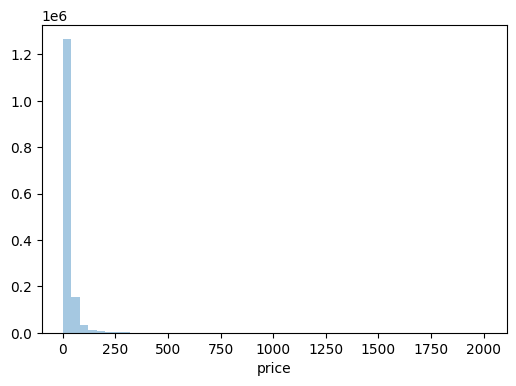

In [27]:
# 왜곡된 값 log

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize = (6,4))
sns.distplot(y_train_df, kde=False)

<ipython-input-28-73f0fb165241>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_df, kde=False)


<Axes: xlabel='price'>

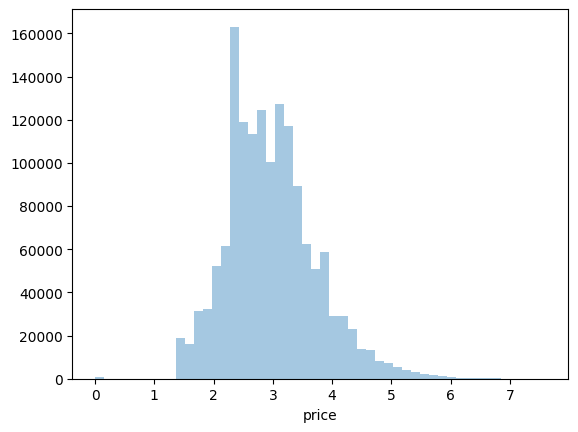

In [28]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

-> 비교적 정규 분포 가까워짐

In [29]:
# price 원래 값에서 로그 변환 값으로 변환

mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [30]:
# 다른 피처 값
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [31]:
boolean_cond=mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [32]:
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null' , 'Other_Null' , 'Other_Null']

# 위의 split_cat( )을 apply lambda에서 호출하여 대,중,소 컬럼을 mercari_df에 생성.
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = \
                        zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 갯수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mercari_df['cat_jung'].nunique())
print('소분류 갯수 :', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [33]:
# Null 값 일관적으로 Other_Null 변경

mercari_df['brand_name']=mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna(value='Other_Null')

**피처 인코딩과 피처 벡터화**

선형 회귀의 경우 원-핫 인코딩 적용이 훨씬 선호되므로 인코딩할 피처는 모두 원-핫 인코딩 적용.

피처 벡터화의 경우 비교적 짧은 텍스트면 count 기반의 벡터화, 긴 텍스트는 TD-IDF 기반의 벡터화



In [34]:
# brand_name 칼럼 -> 별도 피처 벡터화 필요 없음. 원핫 인코딩 변환할것임

print('brand name의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [35]:
# name
print('name의 유형 건수 :', mercari_df['name'].nunique())
print('name sample 10건 : \n', mercari_df['name'][:10])

name의 유형 건수 : 1225273
name sample 10건 : 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [39]:
pd.set_option('max_colwidth', 200)

# item_description의 평균 문자열 크기
print('item_description의 평균 문자열 크기  :', mercari_df['item_description'].str.len().mean())
mercari_df['item_description'][:2]

item_description의 평균 문자열 크기  : 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [40]:
# name 속성에 대한 피처 벡터화 변환
cnt_vec=CountVectorizer()
X_name=cnt_vec.fit_transform(mercari_df.name)

# item_descriotion에 대한 피처 벡터화 변환
tfidf_descp=TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp=tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)


name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


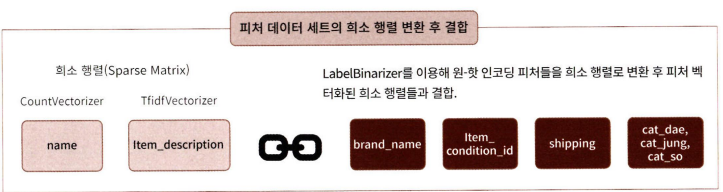

In [41]:
# 인코딩 대상 칼럼을 모두 LabelBinarizer로 원-핫 인코딩 변환

from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name= LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [42]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [43]:
# 앞에서 피처 벡터화 변환한 데이터 세트와 희소 인코딩 변환한 데이터 세트를 hstack()을 이용해 모두 결합

from scipy.sparse import hstack
import gc

sparse_matrix_list=(X_name, X_descp, X_brand, X_item_cond_id,
                    X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

X_features_sparse=hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

del X_features_sparse
gc.collect()

<class 'scipy.sparse._csr.csr_matrix'> (1482535, 161569)


85

**릿지 회귀 모델 구축 및 평가**

- RMSLE

In [44]:
def rmsle(y , y_pred):
    # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test , preds):

    # 원본 데이터는 log1p로 변환되었으므로 exmpm1으로 원복 필요.
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    # rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [45]:
import gc
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 sparse matrix 결합
    X= hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'],
                                                      test_size=0.2, random_state=156)

    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)

    del X , X_train , X_test , y_train
    gc.collect()

    return preds , y_test

In [46]:
# Item_description 속성의 피처 벡터화게 포함되지 않았을때와 포함됐을 때의 예측 성능 비교

linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.4983990938999374
Item Description을 포함한 rmsle 값: 0.4680329023962086


**LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가**



In [47]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1428.521670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1068299
[LightGBM] [Info] Number of data points in the train set: 1186028, number of used features: 65338
[LightGBM] [Info] Start training from score 2.979514
LightGBM rmsle 값: 0.4565268572789318


In [48]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.4466833727832028


-> 앙상블 방식으로 예측 성능 개선.